In [ ]:
pip install powerlaw

In [2]:
import powerlaw
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.stats

In [10]:
a, xmin = 2.5 , 1.0
N = 10000

# generates random variates of power law distribution
xx = list(powerlaw.Power_Law(xmin=xmin, parameters=[a]).generate_random(N))


In [11]:
max(xx)

141.8211157590391

In [12]:
min(xx)

1.0001411492005894

In [14]:
np.mean(xx)

2.8269499410752776

# 1-Plotting linear histogram

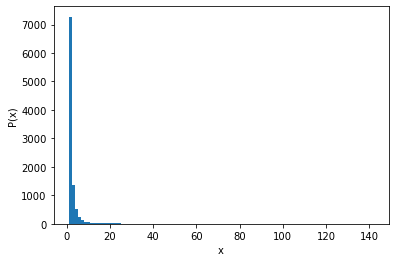

In [13]:
plt.hist(xx,bins=100)
plt.xlabel('x')
plt.ylabel('P(x)')
plt.show()

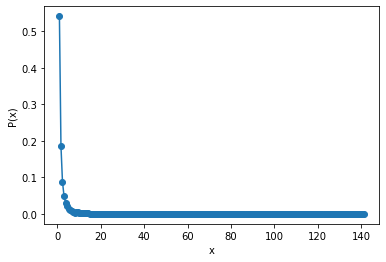

In [18]:
ybinLin,xbinLin=np.histogram(xx,bins=200)
ynorm=[float(i)/sum(ybinLin) for i in ybinLin]
plt.plot(xbinLin[:-1],ynorm,'o-')

plt.xlabel('x')
plt.ylabel('P(x)')
plt.show()

In [17]:
ybinLin

array([5409, 1865,  879,  494,  303,  228,  123,  106,   85,   66,   36,
         42,   45,   27,   25,   17,   25,   16,   20,   14,    9,    9,
          7,    6,    8,    6,    4,    8,    4,    7,    5,    7,    7,
          5,    5,    1,    1,    2,    3,    3,    3,    1,    1,    2,
          5,    2,    1,    3,    2,    1,    3,    0,    1,    2,    0,
          2,    1,    1,    1,    3,    1,    0,    1,    0,    0,    2,
          0,    0,    1,    0,    1,    1,    0,    0,    1,    3,    0,
          0,    0,    2,    1,    1,    0,    0,    0,    0,    0,    0,
          1,    1,    0,    0,    0,    1,    1,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    1,    0,    0,    1,
          1,    0,    0,    0,    0,    0,    0,    0,    0,    1,    1,
          0,    0,    0,    1,    0,    0,    0,    0,    0,    1,    2,
          0,    0,    1,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    1,    0,    0,    0,    0,    0,   

# 2-Plotting log-log histogram

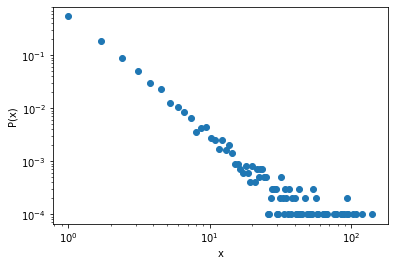

In [19]:
plt.loglog(xbinLin[:-1],ynorm,'o')

plt.xlabel('x')
plt.ylabel('P(x)')
plt.show()

# 3- Plotting cumulative distribution

In [20]:
ycum=[sum(ynorm[i:]) for i in range(len(ynorm))]

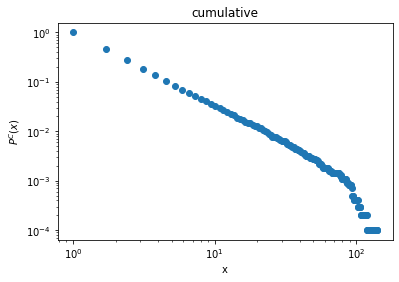

In [21]:
plt.loglog(xbinLin[:-1],ycum,'o')
plt.title('cumulative')
plt.xlabel('x')
plt.ylabel('$P^C(x)$')
plt.show()

# 4- Plotting binned distribution


In [22]:
def logBinning(degreeList,nbin):
    kmin=min(degreeList)
    kmax=max(degreeList)
    logBins = np.logspace(np.log10(kmin), np.log10(kmax),num=nbin)
    logBinDensity, binedges = np.histogram(degreeList, bins=logBins, density=True)
    logBins = np.delete(logBins, -1)
    return logBinDensity, logBins

In [23]:
y,x=logBinning(xx,50)
#plt.loglog(x,y,'o')
#plt.xlabel('x')
#plt.ylabel('P(x)')
#plt.show()

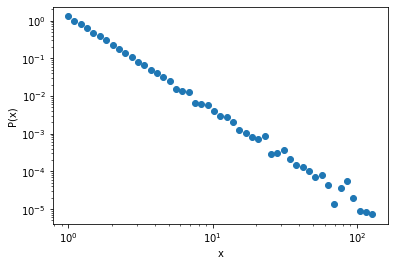

In [26]:
plt.loglog(x,y,'o')
plt.xlabel('x')
plt.ylabel('P(x)')
plt.show()

# 5-calculating power-law fit

In [27]:
def powerLaw(x, a, b):
    return b*x**(a)

In [37]:
fitx=[]
fity=[]
for (i,j) in zip(x,y):
    if i<50:
        fitx.append(i)
        fity.append(j)

In [ ]:
#fitx=[i for (i,j) in zip(x,y) if i<50]
#fity=[j for (i,j) in zip(x,y) if i<50]

popt, pcov = curve_fit(powerLaw, fitx, fity)  
print (popt[0])
#plt.loglog(sorted(x), powerLaw(sorted(x), *popt), '--',c='k',linewidth=3)

#plt.loglog(x,y,'o')
#plt.xlabel('x')
#plt.ylabel('P(x)')
#plt.show()

# 6-Plot ranking

In [ ]:
plt.loglog(range(len(xx)),sorted(xx,reverse=True),'o')

plt.xlabel('rank')
plt.ylabel('x')
plt.show()

# BIVARIATE STATISTICS

xx is distributed according to a power-law distribution. yy is derived from a uniform distribution. I have a set of bivariate variables: (x,y)

In [ ]:
import random
yy=[random.uniform(0,1) for i in xx]

In [ ]:
plt.hist(yy)
plt.show()

In [ ]:
# simple plot of the (x,y) couples
plt.plot(xx,yy,'o',alpha=0.1)
plt.show()

plt.semilogx(xx,yy,'o',alpha=0.1)
plt.show()

In [ ]:
logBins=np.logspace(np.log2(np.min(xx)),np.log2(np.max(xx)),base=2,num=10)
ybin,xbin,binnumber=scipy.stats.binned_statistic(xx,yy,statistic='mean',bins=logBins)
plt.semilogx(xx,yy,'o',alpha=0.1)
plt.semilogx(xbin[:-1],ybin,'o',markersize=10)
plt.show()

In [ ]:
bin_stdevs, _, _ = scipy.stats.binned_statistic(xx, yy, 
                                    statistic='std', 
                                    bins=logBins)

In [ ]:
logBins=np.logspace(np.log2(np.min(xx)),np.log2(np.max(xx)),base=2,num=20)
ybin,xbin,binnumber=scipy.stats.binned_statistic(xx,yy,statistic='mean',bins=logBins)
plt.semilogx(xx,yy,'o',alpha=0.1)
plt.semilogx(xbin[:-1],ybin,'o',markersize=10)

plt.errorbar(xbin[:-1], ybin, bin_stdevs, fmt='o',color="k")
plt.show()